# Genetic Algorithm

## Giới thiệu

### One-max problem

Cho một vector chứa n phần tử, trong đó mỗi phần tử có giá trị 0 hoặc 1. Cho trước một hàm secret với tham số truyền vào chính là vector chứa n phần tử, hàm này trả về một giá trị thể hiện độ tốt (**fitness**). Giá trị của fitness càng cao càng tốt, tìm vector chứa n thỏa mãn yêu cầu trên.
<img align="left" src="one-max.png" >

Giả sử hàm secret ta dùng ở đây là tổng giá trị của các phần tử thuộc vector. Để tạo ra một vector có n phần tử, vì ta không có thêm dữ kiện nào nên giá trị các phần tử trong vector sẽ được lấy ngẫu nhiên. Để tăng xác suất tìm được vector cần tìm, thông thường ta sẽ sinh ra một bộ gồm m vector như vậy. Xem code ví dụ ở dưới.

In [1]:
import random

n = 10
m = 5

vector = [[0]*n]*m

result = [list(map(lambda c: 1 if random.random() <=0.5 else 0,x)) for x in vector]
print("Result: ",result,"\n")

def secret(v):
    return sum(v)

list_fitness_value = [secret(x) for x in result]
print("List_fitness_value", list_fitness_value,"\n")
print("Max fitness: ", max(list_fitness_value),"\n")

Result:  [[1, 1, 1, 1, 0, 0, 0, 1, 0, 0], [0, 1, 1, 0, 0, 1, 1, 1, 1, 0], [1, 0, 1, 0, 1, 1, 0, 0, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0, 1, 0]] 

List_fitness_value [5, 6, 6, 5, 2] 

Max fitness:  6 



Một suy nghĩ đơn giản để tìm ra vector cần tìm khi ta có được một ngưỡng giá trị cần đạt là $\alpha$, ta dừng lại khi $fitness\_value \geq \alpha$. Ta sẽ lặp bước ở trên nhiều lần, sau mỗi lần ta lại kiểm tra xem điều kiện đã thỏa mãn hay chưa. Nhưng khi làm như vậy phát sinh một số vấn đề:
1. Tốn quá nhiều bước lặp
2. Giá trị của hàm fitness không được cải thiện, vì làm như trên cũng chỉ là random
3. Không sử dụng được dữ liệu của lần lặp trước.

Vậy nên trong giải thuật di truyền chúng ta sắp bàn tới ở đây, bước code ở trên được coi là phần khởi tạo giá trị, tiếp đó chúng ta sẽ bổ sung thêm một số bước trung gian để cải thiện được hàm fitness, lấy ý tưởng từ quá trình tiến hóa của con người nói riêng hay sinh vật nói chung.

<img align="left" src="genetic_algorithm.png" >
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
    Như hình trên, chúng ta sẽ có một số khái niệm:<br>
* Gene: là một phần tử trong vector (hay gen),
* Chromosome: một vector (hay gen)
* Population: là toàn bộ vector, hay toàn bộ gen trong quần thể.

Có 5 bước chính trong giải thuật di truyền:
1. Population Initialization
2. Evaluation
3. Selection
4. Crossover
5. Mutation

Chúng ta sẽ lần lượt tìm hiểu chức năng của mỗi bước để hiểu cách hoạt động của giải thuật di truyền.

### Population Initialization  (Khởi tạo quần thể)
Gán các giá trị ngẫu nhiên cho các gen của quần thể

In [2]:
import random
n = 10 # size of individual (chromosome)
m = 5 # size of population

vector = [[0]*n]*m

population = [list(map(lambda c: 1 if random.random() <=0.5 else 0,x)) for x in vector]
print("Result: ",population,"\n")



Result:  [[0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 1, 1, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 0, 1, 0, 1, 1, 1, 1, 1], [1, 1, 1, 0, 0, 0, 1, 1, 1, 0]] 



### Evaluation (Đánh giá fitness)

In [3]:
def secret(v):
    return sum(v)

list_fitness_value = [secret(x) for x in population]
print("List_fitness_value", list_fitness_value,"\n")
print("Max fitness: ", max(list_fitness_value),"\n")

List_fitness_value [5, 6, 5, 7, 6] 

Max fitness:  7 



### Selection (Lựa chọn các cá thể)

Ở đây ta sẽ sử dụng phương pháp lựa chọn đơn giản và phổ biến nhất - Binary Selection<br>
Sắp xếp danh sách các vector theo thứ tự tăng dần bởi giá trị của hàm fitness trả về.


In [4]:
import copy
import numpy as np
sorted_population = copy.deepcopy(population)
sorted_population.sort(key=secret)
print("Sorted population: ",sorted_population,"\n")
print("Original Population: ",population,"\n")

def selection(sorted_list):
    m = len(sorted_list)
    indexs = np.random.choice(m,2,replace=False)
    index_choosed = max(indexs)
    print(indexs,"\n")
    return sorted_list[index_choosed]

#print(selection(sorted_population))

new_population = []
for _ in range(0, len(sorted_population)):
    new_chromosome = selection(sorted_population)
    new_population.append(new_chromosome)
    
print("New population: ", new_population,"\n")

Sorted population:  [[0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [1, 0, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 0, 1, 1, 1, 0, 0, 1, 1], [1, 1, 1, 0, 0, 0, 1, 1, 1, 0], [0, 1, 0, 1, 0, 1, 1, 1, 1, 1]] 

Original Population:  [[0, 1, 0, 1, 0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 1, 1, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 0, 1, 0, 1, 1, 1, 1, 1], [1, 1, 1, 0, 0, 0, 1, 1, 1, 0]] 

[2 4] 

[1 3] 

[4 1] 

[4 0] 

[4 3] 

New population:  [[0, 1, 0, 1, 0, 1, 1, 1, 1, 1], [1, 1, 1, 0, 0, 0, 1, 1, 1, 0], [0, 1, 0, 1, 0, 1, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1, 1, 1, 1, 1]] 



### Crossover (Trao đổi gen giữa các cá thể)

Ở đây ta sử dụng crossover đơn giản - Binary crossover<br>
Ta tạo ra một vector với dựa vào crossover rate, nếu giá trị random nhỏ hơn crossover rate thì trả về true, tức là đổi gen tương ứng giữa hai cá thể ứng với vị trí true đó.
<br>

<img align="left" src="crossover.png" >

In [5]:
import copy
def crossover(individual1, individual2, crossover_rate = 0.9):
    length = len(individual1)
    new_individual1 = copy.deepcopy(individual1)
    new_individual2 = copy.deepcopy(individual2)
    crossover_random_list = [0]*length
    crossover_random_list = list(map(lambda c: random.random(),crossover_random_list))
    for i in range(0, length):
        if crossover_random_list[i] < crossover_rate:
            new_individual1[i],new_individual2[i] = new_individual2[i],new_individual1[i]
    return new_individual1, new_individual2

### Mutation (Đột biến)

Tạo ra một vector dựa vào mutation rate, nếu True thì đột biến tại vị trí đó, giá trị tại vị trí đột biến nằm trong khoảng random ban đầu, trong bài này ta xét giá trị là 0 hoặc 1.

In [6]:
def mutate(individual, mutate_rate = 0.05):
    length = len(individual)
    new_individual = copy.deepcopy(individual)
    mutate_random_list = [0]*length
    mutate_random_list = list(map(lambda c: random.random(),mutate_random_list))
    
    for i in range(0, length):
        if mutate_random_list[i] < mutate_rate:
            new_individual[i] = 1 if random.random() <= 0.5 else 0
    
    return new_individual

### Kết hợp các bước trên lại để hoàn tất thuật toán di truyền 

In [7]:
import random
import copy
import numpy as np

#Step 1: Population Initialization

n = 20 # size of individual (chromosome)
m = 10 # size of population

vector = [[0]*n]*m

population = [list(map(lambda c: 1 if random.random() <=0.5 else 0,x)) for x in vector]
#print("Result: ",population,"\n")

#Step 2: Evaluation
def secret(v):
    return sum(v)

#list_fitness_value = [secret(x) for x in population]
#print("List_fitness_value", list_fitness_value,"\n")
#print("Max fitness: ", max(list_fitness_value),"\n")

#Step 3: Selection

#sorted_population = copy.deepcopy(population)
#sorted_population.sort(key=secret)
#print("Sorted population: ",sorted_population,"\n")
#print("Original Population: ",population,"\n")

def selection(sorted_list):
    m = len(sorted_list)
    indexs = np.random.choice(m,2,replace=False)
    index_choosed = max(indexs)
    #print(indexs,"\n")
    return sorted_list[index_choosed]

#print(selection(sorted_population))

#Step 4: Crossover
def crossover(individual1, individual2, crossover_rate = 0.9):
    length = len(individual1)
    new_individual1 = copy.deepcopy(individual1)
    new_individual2 = copy.deepcopy(individual2)
    crossover_random_list = [0]*length
    crossover_random_list = list(map(lambda c: random.random(),crossover_random_list))
    for i in range(0, length):
        if crossover_random_list[i] < crossover_rate:
            new_individual1[i],new_individual2[i] = new_individual2[i],new_individual1[i]
    return new_individual1, new_individual2


#Step 5: Mutation
def mutate(individual, mutate_rate = 0.05):
    length = len(individual)
    new_individual = copy.deepcopy(individual)
    mutate_random_list = [0]*length
    mutate_random_list = list(map(lambda c: random.random(),mutate_random_list))
    
    for i in range(0, length):
        if mutate_random_list[i] < mutate_rate:
            new_individual[i] = 1 if random.random() <= 0.5 else 0
    
    return new_individual

#Step 6: Cobination theses above step
def create_new_population(old_population,gen = 1):
    sorted_population = sorted(old_population, key=secret)
    new_population = []
    print("BEST fitness: ",secret(sorted_population[-1]),"\n")
    while len(new_population) < m:
        chromosome1 = selection(sorted_population)
        chromosome2 = selection(sorted_population)
    
        #Crossover
        chromosome1, chromosome2 = crossover(chromosome1,chromosome2)
    
        #Mutation
        chromosome1 = mutate(chromosome1)
        chromosome2 = mutate(chromosome2)
    
        new_population.append(chromosome1)
        new_population.append(chromosome2)
        
    return new_population


#Finally
n_generation = 60 #number of generation
for i in range(n_generation):
    population = create_new_population(population,i)
    
    
    

BEST fitness:  15 

BEST fitness:  17 

BEST fitness:  18 

BEST fitness:  18 

BEST fitness:  17 

BEST fitness:  17 

BEST fitness:  18 

BEST fitness:  18 

BEST fitness:  18 

BEST fitness:  18 

BEST fitness:  19 

BEST fitness:  19 

BEST fitness:  19 

BEST fitness:  19 

BEST fitness:  19 

BEST fitness:  19 

BEST fitness:  19 

BEST fitness:  20 

BEST fitness:  20 

BEST fitness:  19 

BEST fitness:  19 

BEST fitness:  19 

BEST fitness:  19 

BEST fitness:  19 

BEST fitness:  20 

BEST fitness:  19 

BEST fitness:  19 

BEST fitness:  19 

BEST fitness:  19 

BEST fitness:  20 

BEST fitness:  20 

BEST fitness:  20 

BEST fitness:  20 

BEST fitness:  20 

BEST fitness:  20 

BEST fitness:  20 

BEST fitness:  20 

BEST fitness:  20 

BEST fitness:  20 

BEST fitness:  20 

BEST fitness:  20 

BEST fitness:  20 

BEST fitness:  20 

BEST fitness:  20 

BEST fitness:  20 

BEST fitness:  20 

BEST fitness:  20 

BEST fitness:  20 

BEST fitness:  20 

BEST fitness:  20 



Kết quả chạy có vẻ ổn trong trường hợp này, nhưng khi quan sát thì ta thấy có một vấn đề là khi đạt max fitness rồi mà vẫn có thể kết quả trả về tốt nhất ở bước tiếp theo nhỏ hơn, quan sát ảnh bên dưới<br>
<img align="left" src="elitism.png" >
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
Để giải quyết vấn đề này, người ta đưa ra khái niệm elitism, tức là với một số n cho trước, ta sao chép n phần từ tốt nhất của thế hệ trước vào thế hệ sau. Đoạn code phía trên được thay đổi như sau:


In [14]:
import random
import copy
import numpy as np

#Step 1: Population Initialization

n = 50 # size of individual (chromosome)
m = 10 # size of population
fitness = []
vector = [[0]*n]*m

population = [list(map(lambda c: 1 if random.random() <=0.5 else 0,x)) for x in vector]
#print("Result: ",population,"\n")

#Step 2: Evaluation
def secret(v):
    return sum(v)

#list_fitness_value = [secret(x) for x in population]
#print("List_fitness_value", list_fitness_value,"\n")
#print("Max fitness: ", max(list_fitness_value),"\n")

#Step 3: Selection

#sorted_population = copy.deepcopy(population)
#sorted_population.sort(key=secret)
#print("Sorted population: ",sorted_population,"\n")
#print("Original Population: ",population,"\n")

def selection(sorted_list):
    m = len(sorted_list)
    indexs = np.random.choice(m,2,replace=False)
    index_choosed = max(indexs)
    #print(indexs,"\n")
    return sorted_list[index_choosed]

#print(selection(sorted_population))

#Step 4: Crossover
def crossover(individual1, individual2, crossover_rate = 0.9):
    length = len(individual1)
    new_individual1 = copy.deepcopy(individual1)
    new_individual2 = copy.deepcopy(individual2)
    crossover_random_list = [0]*length
    crossover_random_list = list(map(lambda c: random.random(),crossover_random_list))
    for i in range(0, length):
        if crossover_random_list[i] < crossover_rate:
            new_individual1[i],new_individual2[i] = new_individual2[i],new_individual1[i]
    return new_individual1, new_individual2


#Step 5: Mutation
def mutate(individual, mutate_rate = 0.05):
    length = len(individual)
    new_individual = copy.deepcopy(individual)
    mutate_random_list = [0]*length
    mutate_random_list = list(map(lambda c: random.random(),mutate_random_list))
    
    for i in range(0, length):
        if mutate_random_list[i] < mutate_rate:
            new_individual[i] = 1 if random.random() <= 0.5 else 0
    
    return new_individual

#Step 6: Cobination theses above step
def create_new_population(old_population,elitism, gen = 1):
    sorted_population = sorted(old_population, key=secret)
    new_population = []
    best = secret(sorted_population[-1])
    fitness.append(best)
    print("BEST fitness: ",best,"\n")
    while len(new_population) < m-elitism:
        chromosome1 = selection(sorted_population)
        chromosome2 = selection(sorted_population)
    
        #Crossover
        chromosome1, chromosome2 = crossover(chromosome1,chromosome2)
    
        #Mutation
        chromosome1 = mutate(chromosome1)
        chromosome2 = mutate(chromosome2)
    
        new_population.append(chromosome1)
        new_population.append(chromosome2)
    
    for i in range(elitism):
        new_population.append(sorted_population[-(i+1)])
    return new_population


#Finally
n_generation = 60 #number of generation
elitism = 2
for i in range(n_generation):
    population = create_new_population(population,elitism,i)

BEST fitness:  29 

BEST fitness:  30 

BEST fitness:  31 

BEST fitness:  32 

BEST fitness:  32 

BEST fitness:  33 

BEST fitness:  33 

BEST fitness:  34 

BEST fitness:  34 

BEST fitness:  36 

BEST fitness:  38 

BEST fitness:  38 

BEST fitness:  40 

BEST fitness:  41 

BEST fitness:  41 

BEST fitness:  41 

BEST fitness:  42 

BEST fitness:  43 

BEST fitness:  43 

BEST fitness:  44 

BEST fitness:  44 

BEST fitness:  44 

BEST fitness:  44 

BEST fitness:  45 

BEST fitness:  45 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  47 

BEST fitness:  48 

BEST fitness:  48 



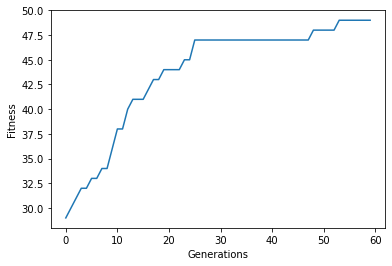

In [18]:
import matplotlib.pyplot as plt

plt.plot(fitness)
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.savefig("result_GA.png")
plt.show()


Chúng ta sử dụng lại code trên có thay đổi một số hàm ở bước khởi tạo và đánh giá, để giải quyết cho bài toàn Sphere
<img align="left" src="sphere.png" >

BEST fitness:  0.0023937075533302745 

BEST fitness:  0.006535807947177637 

BEST fitness:  0.01778337635761987 

BEST fitness:  0.01778337635761987 

BEST fitness:  0.06920225118508797 

BEST fitness:  0.06920225118508797 

BEST fitness:  0.06920225118508797 

BEST fitness:  0.18011259346308683 

BEST fitness:  0.21144338360165732 

BEST fitness:  0.31473107167085496 

BEST fitness:  0.4328570305285952 

BEST fitness:  0.4328570305285952 

BEST fitness:  0.4328570305285952 

BEST fitness:  0.7632238321353637 

BEST fitness:  0.7632238321353637 

BEST fitness:  0.8826780958003122 

BEST fitness:  0.8826780958003122 

BEST fitness:  1.0 

BEST fitness:  1.0 

BEST fitness:  1.0 

BEST fitness:  1.0 

BEST fitness:  1.0 

BEST fitness:  1.0 

BEST fitness:  1.0 

BEST fitness:  1.0 

BEST fitness:  1.0 

BEST fitness:  1.0 

BEST fitness:  1.0 

BEST fitness:  1.0 

BEST fitness:  1.0 

BEST fitness:  1.0 

BEST fitness:  1.0 

BEST fitness:  1.0 

BEST fitness:  1.0 

BEST fitness:  1.0

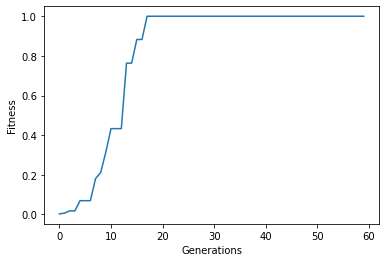

In [19]:
import random
import copy
import numpy as np

#Step 1: Population Initialization

n = 6 # size of individual (chromosome)
m = 50 # size of population
fitness = []
vector = [[0]*n]*m
def generate_value():
    return (random.random()-0.5)*40

population = [list(map(lambda c: generate_value(),x)) for x in vector]
#print("Result: ",population,"\n")

#Step 2: Evaluation
def secret(v):
    return 1/(sum([t*t for t in v]) + 1)

#list_fitness_value = [secret(x) for x in population]
#print("List_fitness_value", list_fitness_value,"\n")
#print("Max fitness: ", max(list_fitness_value),"\n")

#Step 3: Selection

#sorted_population = copy.deepcopy(population)
#sorted_population.sort(key=secret)
#print("Sorted population: ",sorted_population,"\n")
#print("Original Population: ",population,"\n")

def selection(sorted_list):
    m = len(sorted_list)
    indexs = np.random.choice(m,2,replace=False)
    index_choosed = max(indexs)
    #print(indexs,"\n")
    return sorted_list[index_choosed]

#print(selection(sorted_population))

#Step 4: Crossover
def crossover(individual1, individual2, crossover_rate = 0.9):
    length = len(individual1)
    new_individual1 = copy.deepcopy(individual1)
    new_individual2 = copy.deepcopy(individual2)
    crossover_random_list = [0]*length
    crossover_random_list = list(map(lambda c: random.random(),crossover_random_list))
    for i in range(0, length):
        if crossover_random_list[i] < crossover_rate:
            new_individual1[i],new_individual2[i] = new_individual2[i],new_individual1[i]
    return new_individual1, new_individual2


#Step 5: Mutation
def mutate(individual, mutate_rate = 0.05):
    length = len(individual)
    new_individual = copy.deepcopy(individual)
    mutate_random_list = [0]*length
    mutate_random_list = list(map(lambda c: random.random(),mutate_random_list))
    
    for i in range(0, length):
        if mutate_random_list[i] < mutate_rate:
            new_individual[i] = 1 if random.random() <= 0.5 else 0
    
    return new_individual

#Step 6: Cobination theses above step
def create_new_population(old_population,elitism, gen = 1):
    sorted_population = sorted(old_population, key=secret)
    new_population = []
    best = secret(sorted_population[-1])
    fitness.append(best)
    print("BEST fitness: ",best,"\n")
    while len(new_population) < m-elitism:
        chromosome1 = selection(sorted_population)
        chromosome2 = selection(sorted_population)
    
        #Crossover
        chromosome1, chromosome2 = crossover(chromosome1,chromosome2)
    
        #Mutation
        chromosome1 = mutate(chromosome1)
        chromosome2 = mutate(chromosome2)
    
        new_population.append(chromosome1)
        new_population.append(chromosome2)
    
    for i in range(elitism):
        new_population.append(sorted_population[-(i+1)])
    return new_population


#Finally
n_generation = 60 #number of generation
elitism = 2
for i in range(n_generation):
    population = create_new_population(population,elitism,i)
    
    
import matplotlib.pyplot as plt

plt.plot(fitness)
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.savefig("sphere.png")
plt.show()